In [349]:
import pandas as pd

In [350]:
import os
print(os.listdir("../Titanic Survivors/dataSet"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [351]:
df=pd.read_csv("./dataSet/train.csv") #To read trainig dataset to variable df
dft=pd.read_csv("./dataSet/test.csv") #To read testing dataset to variable dft

In [352]:
df.head() #This function displays the first few(5 by default) observations in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [353]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [354]:
df=df.fillna(0) #fillna fills all the NaN values with the integer passed inside the function
dft=dft.fillna(0)

In [355]:
df=df.replace(['male','female'],[0,1]) #Here we are replacing all the stringss male and female with 0 and 1 respectively
dft=dft.replace(['male','female'],[0,1])

In [356]:
df=df.drop(columns=['PassengerId']) #We are dropping PassengerId from df since its of no use in training dataset

In [357]:
out_targets=dft['PassengerId'].values #We are collecting the values of PassengerId from Testing Dataset

In [358]:
cols=[i for i in df.describe()]
colt=[j for j in dft.describe()] #We are saving the attribute names into a list col for training set and colt for testing set
colt

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [359]:
dfRed=df[cols]
dfRed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [360]:
dftRed=dft[colt[1:]]
dftRed.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [361]:
trainLabels=dfRed['Survived'].values
dfRed=dfRed.drop(columns=['Survived'])
trainData=dfRed.values
testData=dftRed.values

In [362]:
print(trainData.shape,trainLabels.shape)
print(testData.shape)

(891, 6) (891,)
(418, 6)


In [363]:
mean=trainData.mean(axis=0)
std=trainData.std(axis=0)
trainData-=mean
trainData/=std

In [364]:
meant=testData.mean(axis=0)
stdt=testData.std(axis=0)
testData-=meant
testData/=stdt #Now the dataset is finally normalized into bein close to 0 and variance nearly unit.

In [365]:
from keras import models,layers,optimizers

In [366]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(trainData,trainLabels,test_size=0.20,shuffle=True)

In [367]:
print(x_train.shape,x_test.shape)

(712, 6) (179, 6)


In [368]:
index=200
x_val=x_train[:index]
y_val=y_train[:index]

In [369]:
partial_x_train = x_train[index:]
partial_y_train=y_train[index:]

In [370]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [371]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

In [372]:
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [373]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=500,
                   batch_size=32,
                   validation_data=(x_val,y_val),
                   verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 20ms/step - loss: 0.8595 - accuracy: 0.6133 - val_loss: 0.8618 - val_accuracy: 0.5700
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.8646 - accuracy: 0.5820 - val_loss: 0.8002 - val_accuracy: 0.5750
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.8002 - accuracy: 0.5625 - val_loss: 0.7511 - val_accuracy: 0.5800
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.7241 - accuracy: 0.5898 - val_loss: 0.7231 - val_accuracy: 0.5850
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.7404 - accuracy: 0.5742 - val_loss: 0.7004 - val_accuracy: 0.6000
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.7393 - accuracy: 0.5918 - val_loss: 0.6826 - val_accuracy: 0.6000
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.6367 - val_loss: 0.6684 - val_accuracy: 0.6100
Epoch 8/500


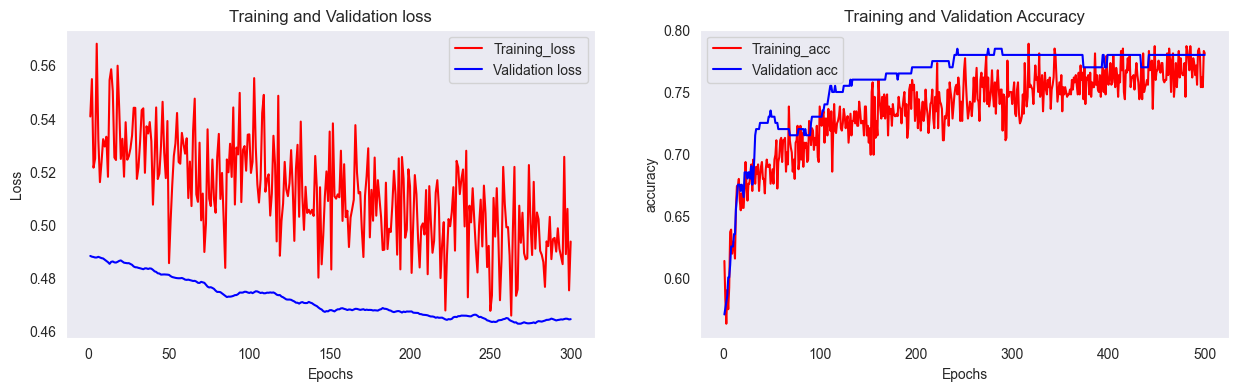

In [411]:
hist = history.history
acc=hist['accuracy']
a=200
b=len(acc)
val_loss=hist['val_loss'][a:b]
loss=hist['loss'][a:b]
val_acc=hist['val_accuracy']
epc = range(1,(b-a)+1)

plt.figure(figsize=(15,4))
plt.clf()
plt.subplot(1,2,1)
plt.plot(epc, loss, 'r', label='Training_loss')
plt.plot(epc, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epc=range(1,len(acc)+1)
plt.subplot(1,2,2)
plt.plot(epc, acc, 'r', label='Training_acc')
plt.plot(epc, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


plt.show()

In [414]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(trainData, trainLabels,
                   epochs=500,
                   batch_size=32,
                   verbose=1)

Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 0.8044 - accuracy: 0.5039
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.5309
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.5701
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7259 - accuracy: 0.5847
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7293 - accuracy: 0.5701
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6195
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.6117
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6184
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6240
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6139
Epoch 11/